# HW1 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2017
#### Due : 3/16 (THU)  11:59 PM 












## Fetching infant mortality rate data from Wikipedia

In this example we will fetch data about countries and their infant mortality rate from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_infant_mortality_rate has several tables for individual countries, subcontinents as well as different years. 


###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### print html code of presented page

> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of countries by infant mortality rate - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

##### Use requests library


In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_infant_mortality_rate'
url_r = requests.get(url)

print url_r.text


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of countries by infant mortality rate - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_infant_mortality_rate","wgTitle":"List of countries by infant mortality rate","wgCurRevisionId":766812539,"wgRevisionId":766812539,"wgArticleId":2525954,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: dates","Lists of countries","Population","Health by country","Death by country","Deaths by country"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigit

## 1. Parsing html data

Data that we are going to use is table titled below:

#### Title: List by the United Nations population division

*print html code of parsed table: List by the United Nations population division*

> *`<table class="class1 class2">`*<br/>
> *`<tr>`*<br/>
> *`<th>#</th>`*<br/>
> *`<th>Country or territory</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

##### Use BeautifulSoup
*hint: class/id can be assigned for elements of html.


In [3]:
"""Parse html and return html tables of wikipedia mortality data."""
soup = BeautifulSoup(url_r.text, "lxml")
tables = soup.find_all('table',{'class':'sortable wikitable'})
print tables[1]

<table class="sortable wikitable" style="text-align:right">
<tr>
<th>#</th>
<th><small>Country or territory<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[Note 1]</a></sup></small></th>
<th><small>1950 /<br/>
1955</small></th>
<th><small>1955 /<br/>
1960</small></th>
<th><small>1960 /<br/>
1965</small></th>
<th><small>1965 /<br/>
1970</small></th>
<th><small>1970 /<br/>
1975</small></th>
<th><small>1975 /<br/>
1980</small></th>
<th><small>1980 /<br/>
1985</small></th>
<th><small>1985 /<br/>
1990</small></th>
<th><small>1990 /<br/>
1995</small></th>
<th><small>1995 /<br/>
2000</small></th>
<th><small>2000 /<br/>
2005</small></th>
<th><small>2005 /<br/>
2010</small></th>
<th><small>2010 /<br/>
2015</small></th>
<th><small>&lt;-CIA</small></th>
</tr>
<tr id="UN_Singapore">
<td>1</td>
<td style="text-align:right;"><a href="/wiki/Singapore" title="Singapore">Singapore</a></td>
<td style="background:#1e1e1e;"><span style="color:#e9e9e9;">60.99</span></td>
<td style="background

## 2. Extracting data and filling it into a dictionary(Python data stucture)

#### Extract mortality data for countries from table and store it in dictionary.
*Please print parsed dictionary at the end of code*

##### Shape of Dictionary
- { *country_name*: { *year*: *infant mortality rate*}}
- e.g. {'Slovenia': {'1950 - 1955':22.77, '1955 - 1960':18.7, ... }, 'Italy':{'1950 - 1955': ... }, ... }

In [4]:
# extract headings and actual data and combine data into single dict
nation = tables[1].find_all('tr')

nameList=[]
nameListText=[]
dic = dict()
for i in range(1, 176):
    nameList.append(nation[i].find_all('td')[1])
    nameListText.append((nameList[i-1].text).replace('>',''))
    yearList1=[]
    yearListText1=[]
    imrList1=[]
    imrListText1=[]
    dic1 = dict()
    for j in range(2,15):
        yearList1.append(tables[1].find_all("th")[j])
        yearT = (yearList1[j-2].text).split("small")[0]
        yearT = yearT.replace("\n","")
        yearT = yearT.replace("/","- ")
        yearT = yearT.encode('ascii')
        imrList1.append(nation[i].find_all("td")[j])
        imrI = float((imrList1[j-2].text).replace('>',''))
        dic1.update({yearT:imrI})
    name = nameListText[i-1]
    name=name.encode('utf-8')
    dic.update({name:dic1})
print dic


{'Canada': {'1995 - 2000': 5.47, '1965 - 1970': 21.27, '1990 - 1995': 6.33, '1975 - 1980': 12.61, '1960 - 1965': 26.53, '1985 - 1990': 7.51, '2000 - 2005': 5.24, '2010 - 2015': 4.73, '2005 - 2010': 5.13, '1980 - 1985': 9.24, '1950 - 1955': 38.5, '1955 - 1960': 32.59, '1970 - 1975': 16.77}, 'East Timor': {'1995 - 2000': 84.75, '1965 - 1970': 201.22, '1990 - 1995': 118.77, '1975 - 1980': 253.8, '1960 - 1965': 220.83, '1985 - 1990': 141.46, '2000 - 2005': 63.99, '2010 - 2015': 43.91, '2005 - 2010': 50.16, '1980 - 1985': 183.65, '1950 - 1955': 264.61, '1955 - 1960': 241.82, '1970 - 1975': 183.36}, 'Sao Tome and Principe': {'1995 - 2000': 54.64, '1965 - 1970': 88.13, '1990 - 1995': 57.53, '1975 - 1980': 64.93, '1960 - 1965': 99.0, '1985 - 1990': 60.54, '2000 - 2005': 51.86, '2010 - 2015': 43.51, '2005 - 2010': 46.05, '1980 - 1985': 63.63, '1950 - 1955': 124.52, '1955 - 1960': 112.38, '1970 - 1975': 76.06}, 'Turkmenistan': {'1995 - 2000': 61.27, '1965 - 1970': 120.54, '1990 - 1995': 75.51, '

## 3. Creating a dataframe(Python data structure) from a dictionary

* Shape of dataframe must be like following table.
* i.e. indices: countries, columns: period
<table>
  <tr>
    <th></th>
    <th>1950 /<br>1955</th>
    <th>1955 /<br>1960</th>
    <th>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
    <th>2010 /<br>2015</th>
  </tr>
  <tr>
    <td>Singapore</td>
    <td>60.99</td>
    <td>43.2</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>1.77</td>
  </tr>
  <tr>
    <td>Iceland</td>
    <td>21.43</td>
    <td>18.5</td>
    <td></td>
    <td>2.03</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Sierra Leone</td>
    <td>236.9</td>
    <td>229.39</td>
    <td></td>
    <td>94.43</td>
  </tr>
</table>

In [5]:
df = pd.DataFrame(dic)
df = df.T
df = pd.DataFrame.from_dict(dic, orient='index')

df.sort_index(axis=1,inplace=True)
print df

                          1950 - 1955  1955 - 1960  1960 - 1965  1965 - 1970  \
Afghanistan                    280.98       256.27       234.26       216.07   
Albania                        144.92       124.94        98.95        76.97   
Algeria                        163.06       153.57       142.88       132.35   
Angola                         230.82       215.04       200.16       186.20   
Argentina                       63.93        58.80        59.76        57.41   
Armenia                         83.00        78.00        73.01        68.01   
Australia                       23.69        21.34        19.72        17.99   
Austria                         55.11        43.20        32.78        26.43   
Azerbaijan                     120.05       115.04       110.05       105.05   
Bahamas                         70.58        58.31        48.14        39.72   
Bahrain                        172.56       146.78       105.44        70.81   
Bangladesh                     220.69   

## 3-1. Some data accessing functions for a panda dataframe

In [6]:
# Use the following code

subtable = df.iloc[0:5, 0:5]
print "<subtable>"
print subtable
print "end of subtable\n\n"

column = df['1955 - 1960']
print "<column>"
print column
print "end of column\n\n"

column = df[['1955 - 1960', '1960 - 1965', '1965 - 1970']]
print "<columns>"
print column
print "end of columns\n\n"


row = df.ix[0] #row 0
print "<row>"
print row
print "end of row\n\n"

rows = df.ix[:2] #rows 0,1
print "<rows>"
print rows
print "end of rows\n\n"

element = df.ix[0,'1955 - 1960'] #element
print "<element>"
print element
print "end of element\n\n"

# max along column
print "<max>"
print df['1950 - 1955'].max()
print "end of max\n\n"

# axes
print "<axes>"
print df.axes
print "end of axes\n\n"

row = df.ix[0]
print "<row info>"
print row.name
print row.index
print "end of row info\n\n"

countries =  df.index
print "<countries>"
print countries
print "end of countries\n\n"

print "<row: Austria>"
print df.ix['Austria']
print "end of row\n\n"

<subtable>
             1950 - 1955  1955 - 1960  1960 - 1965  1965 - 1970  1970 - 1975
Afghanistan       280.98       256.27       234.26       216.07       198.77
Albania           144.92       124.94        98.95        76.97        57.99
Algeria           163.06       153.57       142.88       132.35       122.25
Angola            230.82       215.04       200.16       186.20       173.03
Argentina          63.93        58.80        59.76        57.41        48.12
end of subtable


<column>
Afghanistan                 256.27
Albania                     124.94
Algeria                     153.57
Angola                      215.04
Argentina                    58.80
Armenia                      78.00
Australia                    21.34
Austria                      43.20
Azerbaijan                  115.04
Bahamas                      58.31
Bahrain                     146.78
Bangladesh                  189.20
Belarus                      56.56
Belgium                      35.45
Belize    

## 4-1. Print top 5 countries with the highest/lowest infant mortality rate in 1950-1955. (total 10 countries)

In [7]:
# write your code here

dfa = df.sort_values(['1950 - 1955'])
print "**  lowest infant mortality rate in '1950 - 1955'  **"
print dfa.index[0]
print dfa.index[1]
print dfa.index[2]
print dfa.index[3]
print dfa.index[4]
print "\n**  highest infant mortality rate in '1950 - 1955'  **"
print dfa.index[-1]
print dfa.index[-2]
print dfa.index[-3]
print dfa.index[-4]
print dfa.index[-5]


**  lowest infant mortality rate in '1950 - 1955'  **
Sweden
Iceland
Norway
Slovenia
Netherlands

**  highest infant mortality rate in '1950 - 1955'  **
Afghanistan
Bhutan
Côte d'Ivoire
East Timor
Pakistan


## 4-2. Print top 5 countries with the lowest infant mortality rate in 1990-2015.
##### * Extract the lowest 5 countries based on the mean of a given period

In [8]:
sf = df[['1990 - 1995', '1995 - 2000', '2000 - 2005', '2005 - 2010','2010 - 2015']]
rank = []
save = []
#print sf.ix[-1]
for i in range (0,175):
    rank.append(sf.ix[i].sum())
    save.append(sf.ix[i].sum())

save.sort()

print "** Top 5 countries with the lowest infant mortality rate in '1990 - 2015' **"
for i in range (0,5):
    for j in range (0,175):
        if save[i]==rank[j]:
            print sf.index[j]
#print save

** Top 5 countries with the lowest infant mortality rate in '1990 - 2015' **
Singapore
Iceland
Japan
Finland
Sweden


## 5-1. Create a sub-dataframe for the five countries extracted in question 4-2.
<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">1950 /<br>1955</th>
    <th class="tg-yw4l">1955 /<br>1960</th>
    <th class="tg-baqh">...</th>
    <th class="tg-yw4l">2010 /<br>2015</th>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 1   </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">       ...       </td>
    <td class="tg-yw4l">                    </td>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 2</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-baqh">...</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">Country 5</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
</table>

In [9]:
# write your code here
cf = df
cf['rank'] = rank
cf = cf.sort_values(['rank'])
cf = cf.iloc[0:5,0:13]

print cf



           1950 - 1955  1955 - 1960  1960 - 1965  1965 - 1970  1970 - 1975  \
Singapore        60.99        43.20        28.62        23.79        19.35   
Iceland          21.43        18.50        16.74        13.41        11.85   
Japan            50.07        37.25        25.84        16.48        11.95   
Finland          34.47        26.07        19.53        15.08        11.95   
Sweden           19.71        16.97        15.63        12.53        10.53   

           1975 - 1980  1980 - 1985  1985 - 1990  1990 - 1995  1995 - 2000  \
Singapore        12.85         8.76         5.48         4.64         4.08   
Iceland           9.42         6.40         5.62         4.79         4.01   
Japan             8.75         6.63         4.96         4.44         3.75   
Finland           8.77         6.50         6.01         5.11         3.86   
Sweden            7.92         6.78         6.17         5.34         3.64   

           2000 - 2005  2005 - 2010  2010 - 2015  
Singapore  

## 5-2. Plot broken-line chart using dataframe that created from problem 5-1.

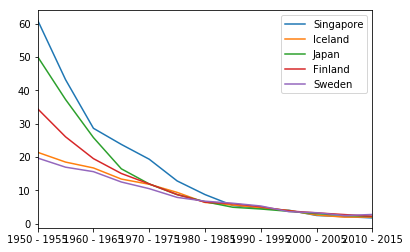

In [10]:
# Use the following code
cf.transpose().plot(legend='True')